In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import models
%matplotlib inline

In [2]:
plt.style.use("grayscale")
plt.style.use("seaborn-whitegrid")

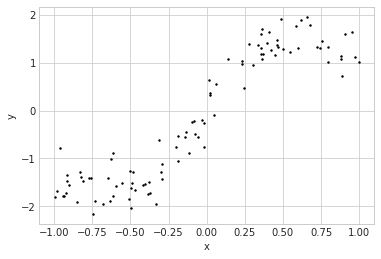

In [13]:
N = 100
sigma2_true = 0.1

# x = np.random.normal(size=N)
x = np.random.uniform(low=-1, high=1, size=N)
func = lambda x: np.sin(x*3) + x - 0.3*x**2
y = func(x) + np.random.normal(scale=np.sqrt(sigma2_true), size=N)

plt.scatter(x, y, s=2, c="k")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
xmin, xmax = x.min(), x.max()
xline = np.linspace(xmin, xmax, num=50)

# OLS

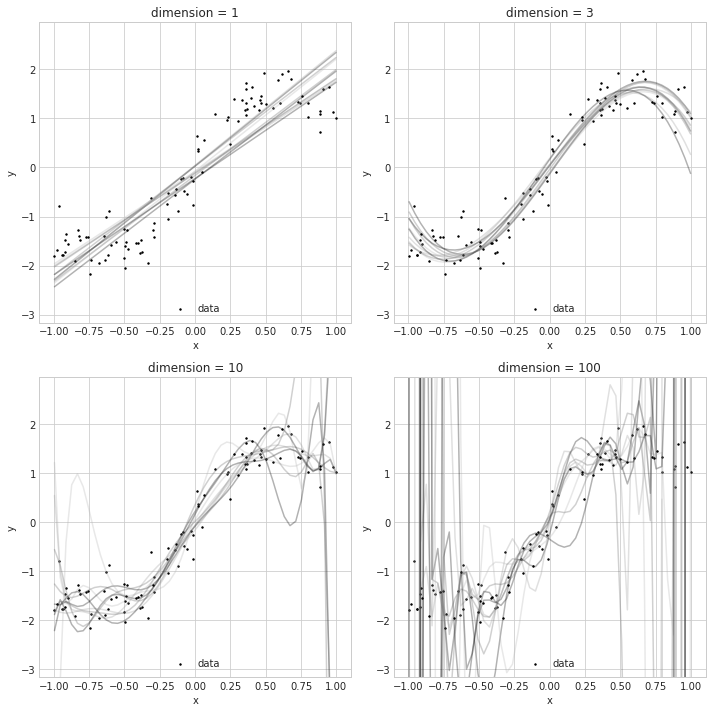

In [51]:
n_sample = 30
n_iter = 10
polydims = [1, 3, 10, 100]

plt.figure(figsize=(10,10))
for i, polydim in enumerate(polydims):
    Phi = models.PolyBaseFunction(x, dims=polydim)
    philine = models.PolyBaseFunction(xline, dims=polydim)

    if i == 0:
        ax = plt.subplot(2, 2, i+1)
    else:
        plt.subplot(2, 2, i+1, sharey=ax)
    plt.title("dimension = {}".format(polydim))
    for _ in range(n_iter):
        chosen = np.random.choice(range(N), size=n_sample)
        lm = models.LinearRegression(y[chosen], Phi[chosen])
        lm.fit_OLS()

        plt.plot(xline, lm.predict_OLS(philine), alpha=0.3)

    plt.scatter(x, y, s=2, c="k", label="data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(y.min()-1, y.max()+1)
    plt.legend(loc="lower center")
    
plt.tight_layout()
plt.savefig("../draft/img/BiasVariance.png", dpi=300)
plt.show()

# Ridge

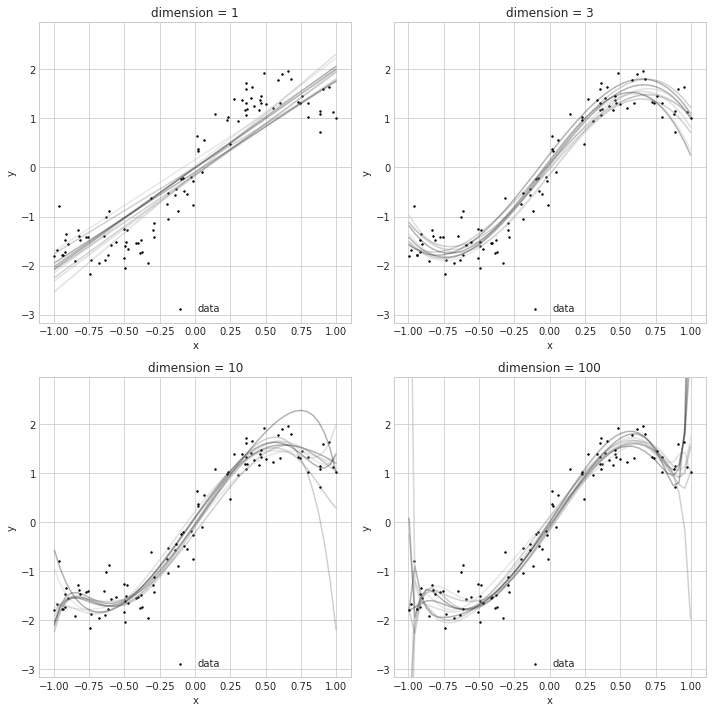

In [52]:
n_sample = 30
n_iter = 10
polydims = [1, 3, 10, 100]

plt.figure(figsize=(10,10))
for i, polydim in enumerate(polydims):
    Phi = models.PolyBaseFunction(x, dims=polydim)
    philine = models.PolyBaseFunction(xline, dims=polydim)

    if i == 0:
        ax = plt.subplot(2, 2, i+1)
    else:
        plt.subplot(2, 2, i+1, sharey=ax)
    plt.title("dimension = {}".format(polydim))
    for _ in range(n_iter):
        chosen = np.random.choice(range(N), size=n_sample)
        lm = models.LinearRegression(y[chosen], Phi[chosen])
        lm.fit_Ridge(alpha=0.01)

        plt.plot(xline, lm.predict_Ridge(philine), alpha=0.3)

    plt.scatter(x, y, s=2, c="k", label="data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(y.min()-1, y.max()+1)
    plt.legend(loc="lower center")
    
plt.tight_layout()
plt.savefig("../draft/img/BiasVarianceRidge.png", dpi=300)
plt.show()